In [1]:
!pip install kaggle


In [2]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset


Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
usa-real-estate-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service
import pandas as pd
import os
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [3]:
df = pd.read_csv('realtor-data.zip.csv')

In [4]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [7]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [8]:
len(df)

df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [7]:
df.drop(columns=['prev_sold_date'], inplace=True)

In [8]:
df_cleaned = df.dropna()

In [9]:
len(df_cleaned)

1354105

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1354105 entries, 0 to 2226381
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   brokered_by  1354105 non-null  float64
 1   status       1354105 non-null  object 
 2   price        1354105 non-null  float64
 3   bed          1354105 non-null  float64
 4   bath         1354105 non-null  float64
 5   acre_lot     1354105 non-null  float64
 6   street       1354105 non-null  float64
 7   city         1354105 non-null  object 
 8   state        1354105 non-null  object 
 9   zip_code     1354105 non-null  float64
 10  house_size   1354105 non-null  float64
dtypes: float64(8), object(3)
memory usage: 124.0+ MB


In [12]:
df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf], 
                                 labels = ['Affordable', 'Mid-range', 'High-end', 'Luxury', 'Ultra-Luxury']
)


country_area = ['Montana', 'Wyoming','Iowa']

df_filtered = df_cleaned[df_cleaned['state'].isin(country_area)]

country_count = df_filtered.groupby('city').size()

filtered_cities = country_count[country_count == 1].index

df_country = df_filtered[df_filtered['city'].isin(filtered_cities)]


C:\Users\Dell\AppData\Local\Temp\ipykernel_15368\1208489819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf],


In [13]:
df_country= df_country[['city','state','house_size','bed','bath','price','PriceSegment']]
df_country

,city,state,house_size,bed,bath,price,PriceSegment
768705,Albion,Iowa,1580.0,3.0,2.0,129900.0,Affordable
770170,Van Wert,Iowa,2263.0,4.0,3.0,349000.0,Affordable
770286,Deep River,Iowa,1052.0,3.0,2.0,60000.0,Affordable
770302,Webster,Iowa,3940.0,4.0,2.0,649900.0,Mid-range
770784,Linden,Iowa,1625.0,3.0,3.0,450000.0,Affordable
...,...,...,...,...,...,...,...
1842490,Haugan,Montana,1040.0,3.0,2.0,259000.0,Affordable
1842583,Pablo,Montana,1357.0,2.0,1.0,155000.0,Affordable
1842775,Milltown,Montana,1260.0,2.0,1.0,289000.0,Affordable
1843133,Fortine,Montana,6185.0,6.0,4.0,1750000.0,High-end


In [14]:
con = sqlite3.connect('AmericaHouse.db')
cur = con.cursor()

In [15]:
%load_ext sql 

In [16]:
%sql sqlite:///AmericaHouse.db

In [17]:
df_country.to_sql('CityArea',con,if_exists = 'replace',index = False)

237

In [18]:
%%sql 
SELECT *
FROM CityArea
WHERE [price] >= 1000000

 * sqlite:///AmericaHouse.db
Done.


city,state,house_size,bed,bath,price,PriceSegment
La Motte,Iowa,4132.0,4.0,4.0,1075000.0,High-end
Silesia,Montana,3516.0,3.0,3.0,2500000.0,Luxury
Lodge Grass,Montana,2300.0,7.0,3.0,2475000.0,Luxury
Cohagen,Montana,1666.0,3.0,2.0,6400000.0,Ultra-Luxury
Craig,Montana,5966.0,5.0,6.0,3995000.0,Luxury
East Glacier Park,Montana,4692.0,10.0,10.0,2150000.0,Luxury
Feed,Montana,1848.0,4.0,2.0,1900000.0,High-end
Seeley Lake River Watch Trl,Montana,2954.0,4.0,5.0,1150000.0,High-end
Olney,Montana,773.0,3.0,1.0,11500000.0,Ultra-Luxury
Troy White Dr,Montana,3128.0,3.0,2.0,3200000.0,Luxury


In [19]:
con.close()

In [28]:
df_country['price'] = df_country['price'].astype(np.float64)


# Phân tích giá nhà tại các khu vực nông thôn

In [32]:
stats = df_country.describe()
print("Thống kê mô tả tổng quát cho giá bất động sản")
print(stats.to_string(float_format='{:.2f}'.format))

Thống kê mô tả tổng quát cho giá bất động sản
       house_size    bed   bath       price
count      237.00 237.00 237.00      237.00
mean      1936.67   3.28   2.14   438838.61
std       1083.22   1.25   1.22   980214.09
min        576.00   1.00   1.00     5500.00
25%       1215.00   3.00   1.00   104000.00
50%       1596.00   3.00   2.00   199000.00
75%       2288.00   4.00   3.00   395000.00
max       7600.00  10.00  10.00 11500000.00


In [35]:
import numpy as np

price_variance_by_location = df_country.groupby('state')['price'].apply(lambda x: np.var(x))
print(price_variance_by_location.to_string(float_format = '{:.2f}'.format))

state
Iowa        29964263266.17
Montana   3285929976187.45
Wyoming    551186032699.47


In [37]:
# Số lượng bất động sản theo khu vực

count_by_city = df_country['city'].value_counts()
count_by_city

city
Albion          1
Spring Hill     1
Lysite          1
Four Corners    1
Alva            1
               ..
Marquette       1
Andover         1
Waterville      1
Wayland         1
Jay Em          1
Name: count, Length: 237, dtype: int64

In [38]:
# Hệ số biến thiên giá (coeefficient of variation) 
cv = df_country['price'].std() / df_country['price'].mean()
cv

2.233655085168908

In [39]:
# Độ phân tán giá
price_range = df_country['price'].max() - df_country['price'].min()

price_range

11494500.0

In [40]:
Q1 = df_country['price'].quantile(0.25)
Q3 = df_country['price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_country[(df_country['price'] < (Q1 - 1.5 * IQR)) | (df_country['price'] > (Q3 + 1.5 * IQR))]

outliers

,city,state,house_size,bed,bath,price,PriceSegment
770946,Booneville,Iowa,3687.0,5.0,5.0,895000.0,Mid-range
781098,La Motte,Iowa,4132.0,4.0,4.0,1075000.0,High-end
846576,Silesia,Montana,3516.0,3.0,3.0,2500000.0,Luxury
847334,Lodge Grass,Montana,2300.0,7.0,3.0,2475000.0,Luxury
848217,Cohagen,Montana,1666.0,3.0,2.0,6400000.0,Ultra-Luxury
848772,Craig,Montana,5966.0,5.0,6.0,3995000.0,Luxury
848840,East Glacier Park,Montana,4692.0,10.0,10.0,2150000.0,Luxury
849013,Feed,Montana,1848.0,4.0,2.0,1900000.0,High-end
849743,Georgetown Lake,Montana,2464.0,5.0,2.0,850000.0,Mid-range
850648,Whitehall Mt Highway 55,Montana,2848.0,3.0,2.0,879000.0,Mid-range


In [41]:
# Độ lệch trung bình tuyệt đối (mean absolute deviation)
price_data = df_country['price']
mean_price = price_data.mean()

mad = (price_data - mean_price).abs().mean()

mad


417130.20594990125

In [42]:
# Tần suất xuất hiện của giá (frequency analysis)
frequency = df_country['PriceSegment'].value_counts()
frequency

PriceSegment
Affordable      193
Mid-range        27
High-end          8
Luxury            7
Ultra-Luxury      2
Name: count, dtype: int64

In [43]:
# Hệ số tương quan giữa gía và diện tích
corr_price_area = df_country['price'].corr(df_country['house_size'])
corr_price_area

0.23970207981471964

In [44]:
# Hệ số tương quan giữa giá và phòng ngủ
corr_price_bed = df_country['price'].corr(df_country['bed'])
corr_price_bed

0.15381429562867543

In [45]:
# Hệ số tương quan giữa vùng 
mean_price_by_location = df_country.groupby('state')['price'].mean()
mean_price_by_location.sort_values(ascending = False)

state
Montana    1.005998e+06
Wyoming    7.264782e+05
Iowa       2.010432e+05
Name: price, dtype: float64

In [46]:
outliers_upper = df_country[df_country['price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df_country[df_country['price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper : {outliers_upper}')
print(f'Outliers lower : {outliers_lower}')

Outliers upper :                                 city    state  house_size   bed  bath  \
770946                    Booneville     Iowa      3687.0   5.0   5.0   
781098                      La Motte     Iowa      4132.0   4.0   4.0   
846576                       Silesia  Montana      3516.0   3.0   3.0   
847334                   Lodge Grass  Montana      2300.0   7.0   3.0   
848217                       Cohagen  Montana      1666.0   3.0   2.0   
848772                         Craig  Montana      5966.0   5.0   6.0   
848840             East Glacier Park  Montana      4692.0  10.0  10.0   
849013                          Feed  Montana      1848.0   4.0   2.0   
849743               Georgetown Lake  Montana      2464.0   5.0   2.0   
850648       Whitehall Mt Highway 55  Montana      2848.0   3.0   2.0   
852482   Seeley Lake River Watch Trl  Montana      2954.0   4.0   5.0   
853397                         Olney  Montana       773.0   3.0   1.0   
853436                 Troy White 

In [47]:
price_quantiles = df_country['price'].quantile([0.25,0.5,0.7,1.0])
price_quantiles

0.25      104000.0
0.50      199000.0
0.70      341720.0
1.00    11500000.0
Name: price, dtype: float64

# Data Visualization

In [48]:
df_country.head()

,city,state,house_size,bed,bath,price,PriceSegment
768705,Albion,Iowa,1580.0,3.0,2.0,129900.0,Affordable
770170,Van Wert,Iowa,2263.0,4.0,3.0,349000.0,Affordable
770286,Deep River,Iowa,1052.0,3.0,2.0,60000.0,Affordable
770302,Webster,Iowa,3940.0,4.0,2.0,649900.0,Mid-range
770784,Linden,Iowa,1625.0,3.0,3.0,450000.0,Affordable


Text(0, 0.5, 'Giá BĐS trung bình (USD')

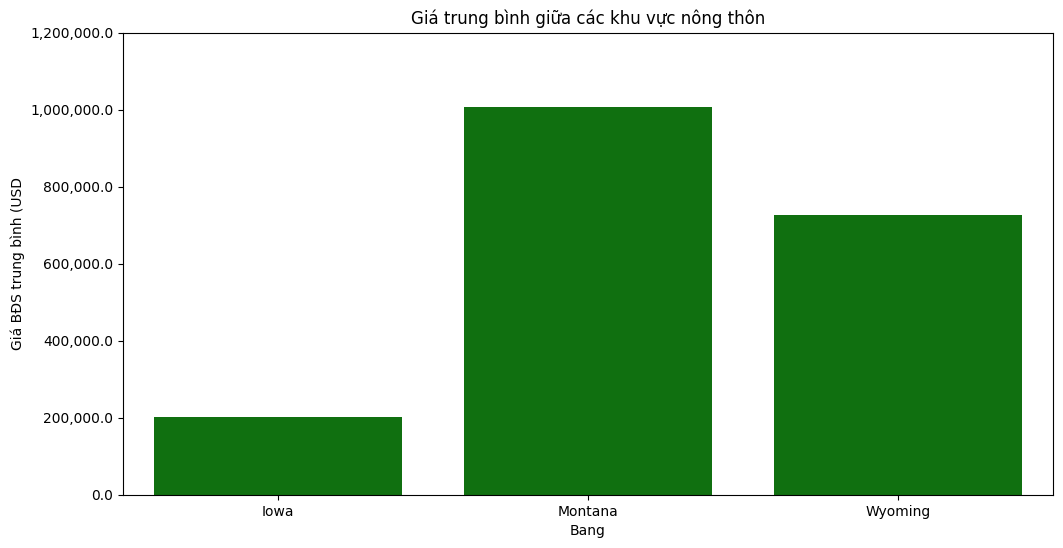

In [49]:
average_state = df_country.groupby('state')['price'].mean()

plt.figure(figsize =(12,6))
sns.barplot(x =average_state.index, y =average_state.values, color = 'green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các khu vực nông thôn')
plt.xlabel('Bang')
plt.ylabel('Giá BĐS trung bình (USD')

Text(0, 0.5, 'USD')

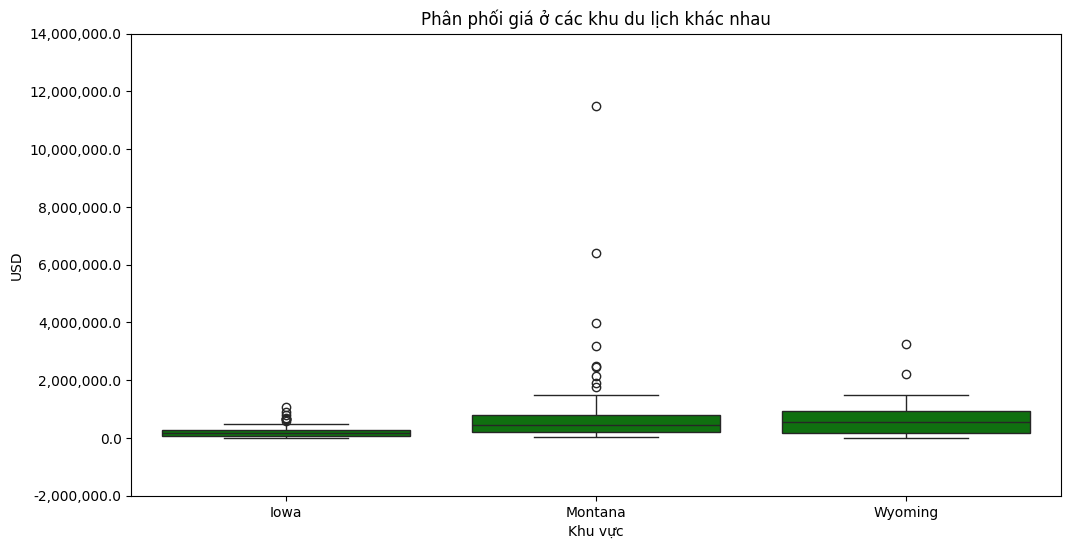

In [50]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'state', y = 'price', data = df_country, color = 'Green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])


plt.title('Phân phối giá ở các khu du lịch khác nhau')
plt.xlabel('Khu vực')
plt.ylabel('USD')

''

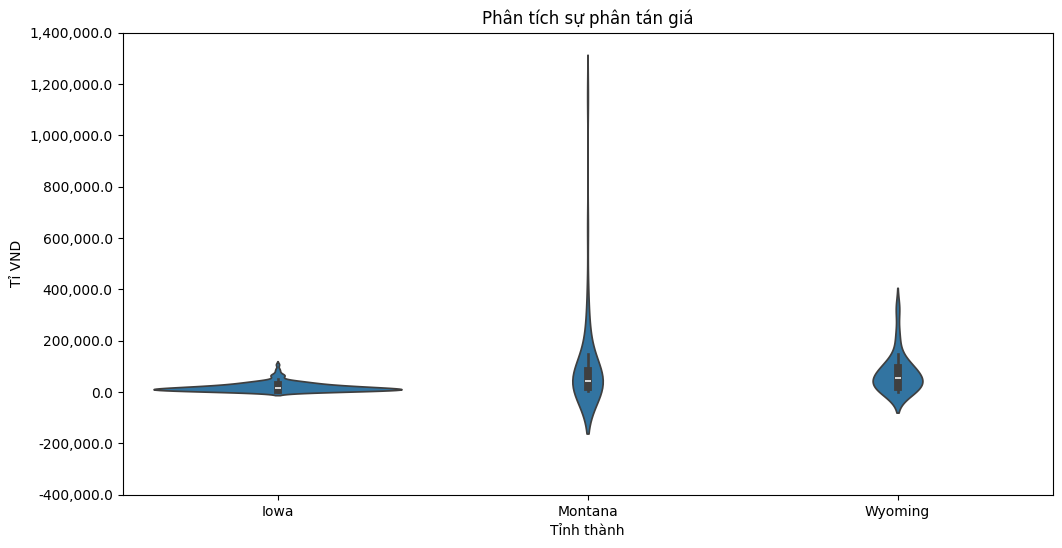

In [51]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='state', y='price', data=df_country)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in yticks])

plt.title('Phân tích sự phân tán giá')
plt.xlabel('Tỉnh thành')
plt.ylabel('Tỉ VND')
;

Text(0, 0.5, 'Giá USD')

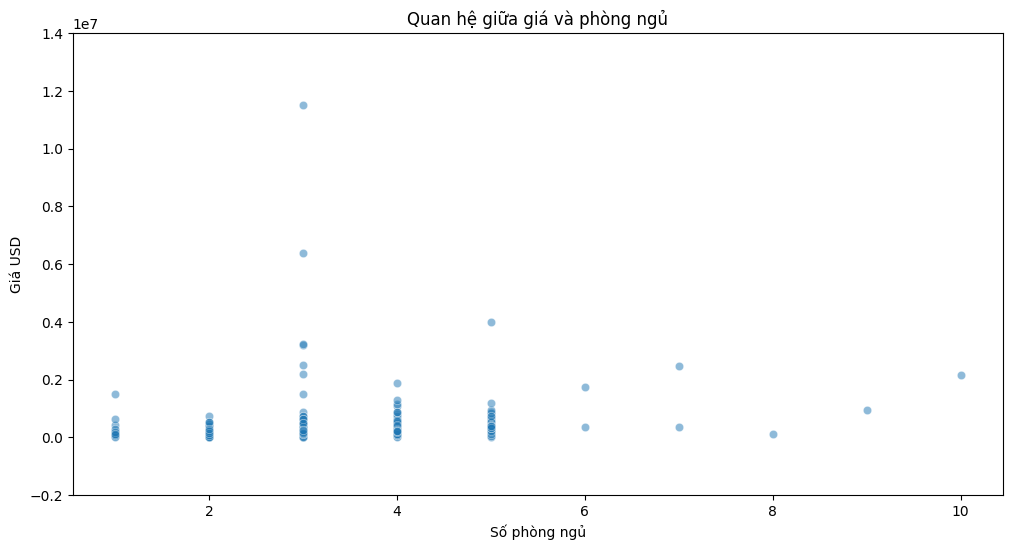

In [52]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='bed', y='price', data=df_country, alpha=0.5)

yticks = plt.yticks()[0]
plt.yticks(yticks,label = [f'{float(tick) / (10):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và phòng ngủ')

plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá USD')

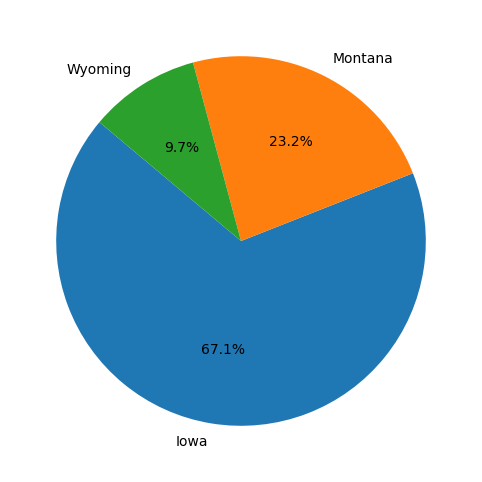

In [53]:
real_estate_counts = df_country['state'].value_counts()

plt.figure(figsize = (12,6))
plt.pie(real_estate_counts, labels = real_estate_counts.index, autopct ='%1.1f%%', startangle = 140);

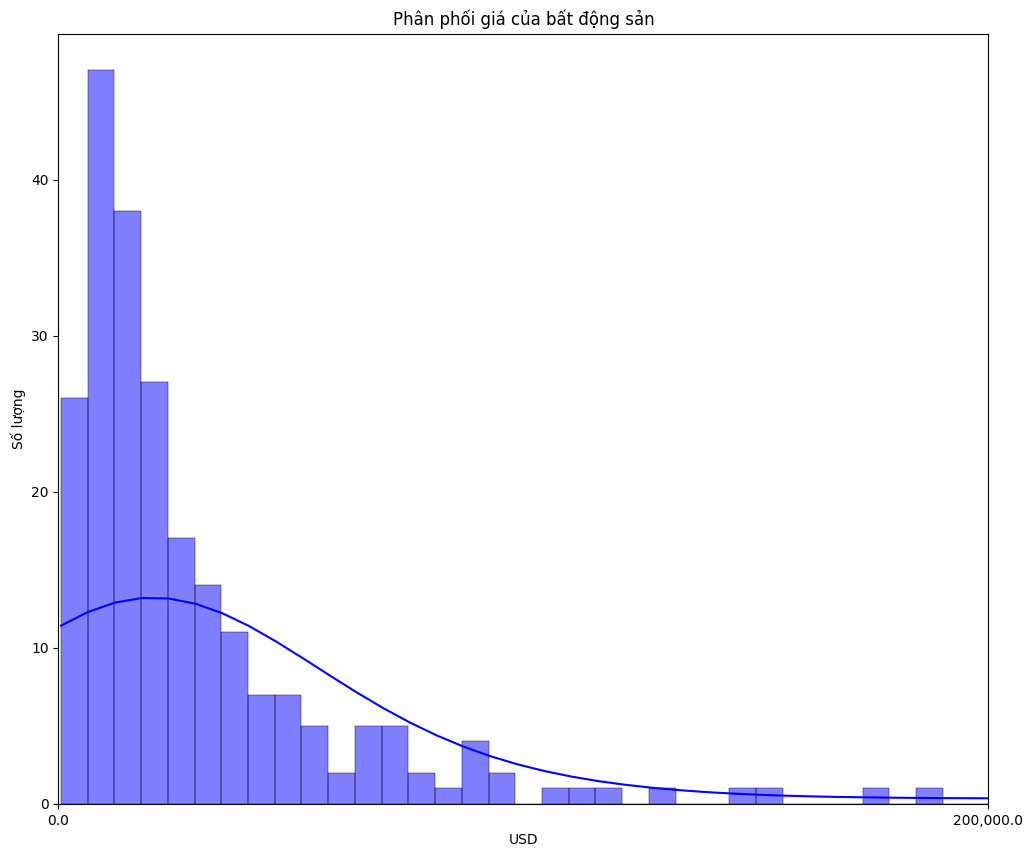

In [59]:
plt.figure(figsize=(12, 10))
sns.histplot(df_country['price'], kde=True, color='blue',bins = 200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in xticks])
plt.xlim(0)
plt.xlim(0,2000000)

plt.title('Phân phối giá của bất động sản')
plt.xlabel('USD')
plt.ylabel('Số lượng');

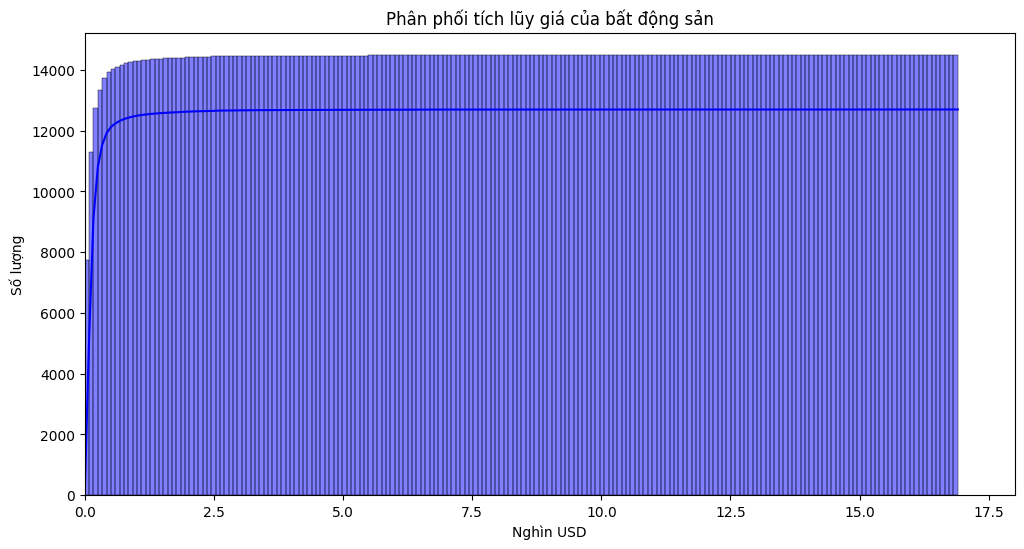

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df_country['price'], kde=True, color='blue', cumulative=True, bins=200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in xticks])
plt.xlim(0,180000000)

plt.title('Phân phối tích lũy giá của bất động sản')
plt.xlabel('Nghìn USD')
plt.ylabel('Số lượng');

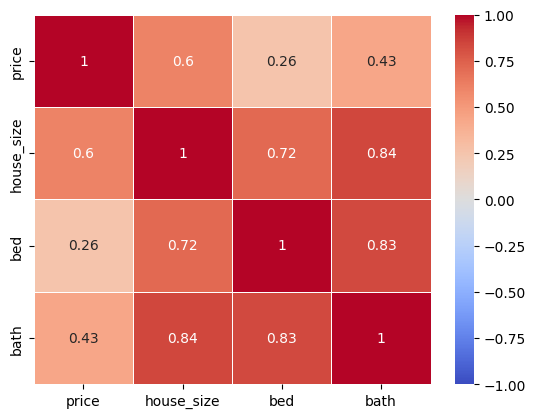

In [61]:
# Heatmap: Tương quan giữa giá và các yếu tố khác.
corr_matrix = df_country[['price', 'house_size','bed', 'bath']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5);

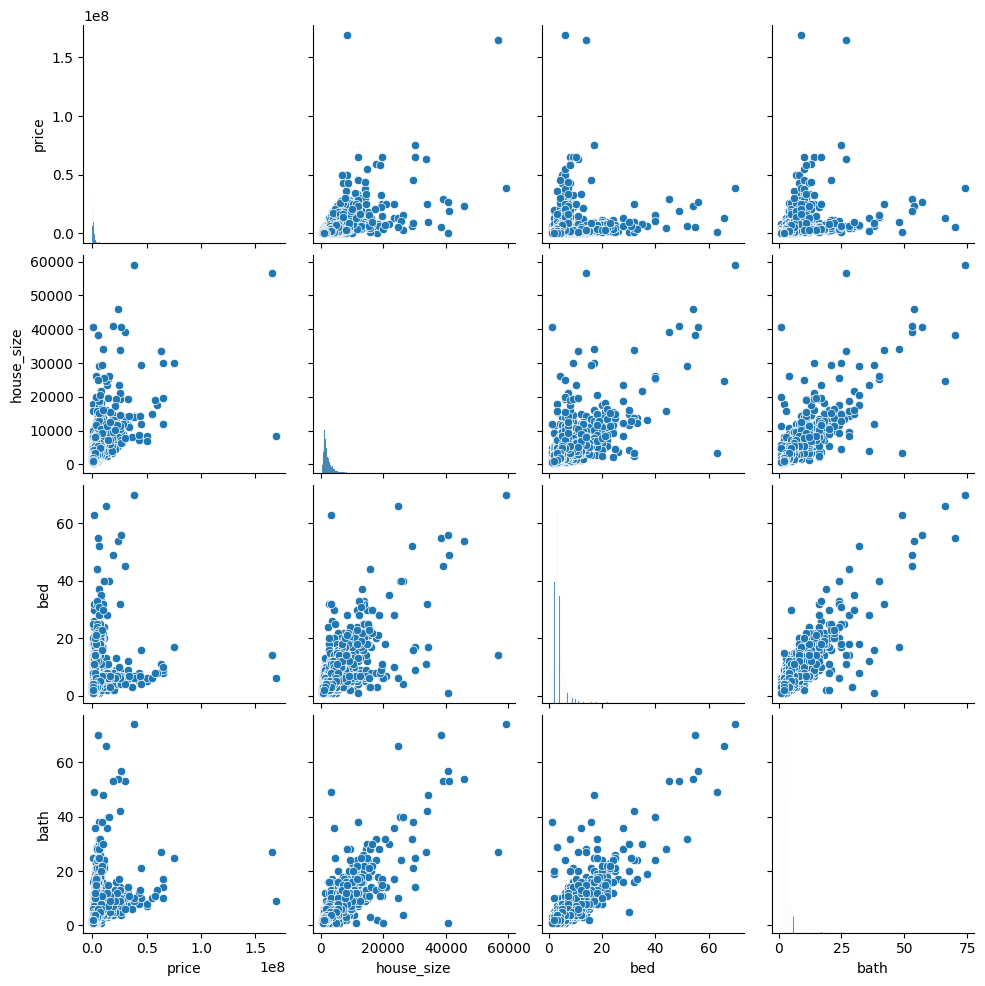

In [62]:
sns.pairplot(df_country[['price', 'house_size','bed', 'bath']]);

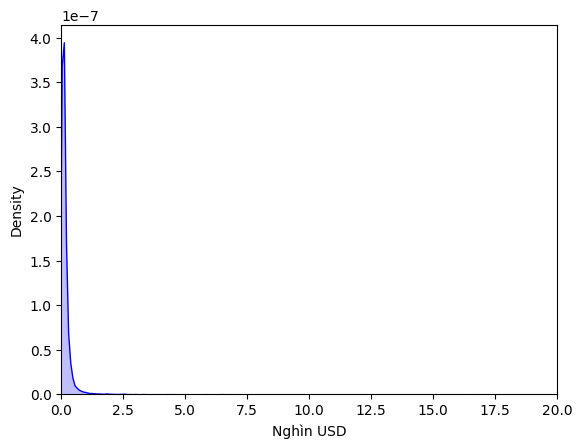

In [70]:
sns.kdeplot(df_country['price'], color='blue', fill=True)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in xticks])
plt.xlim(0)

plt.xlabel('Nghìn USD');

''

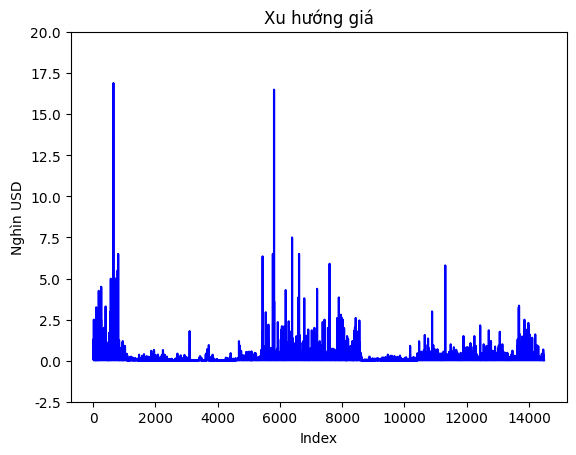

In [65]:
sns.lineplot(data=df_country['price'], color='blue')
plt.fill_between(df_country.index, df_country['price'], color='blue', alpha=0.3)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in yticks])

plt.title('Xu hướng giá')
plt.xlabel('Index')
plt.ylabel('Nghìn USD')
;


''

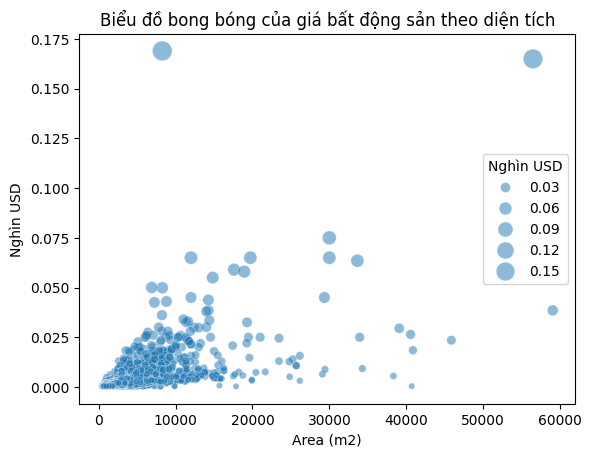

In [64]:
price_billion = df_country['price'].apply(lambda x: x/(10**9))

sns.scatterplot(x=df_country.house_size, y=price_billion, size=price_billion, sizes=(20, 200), alpha=0.5)

plt.title('Biểu đồ bong bóng của giá bất động sản theo diện tích')
plt.xlabel('Area (m2)')
plt.ylabel('Nghìn USD')

plt.legend(title='Nghìn USD', fontsize='10')

;

In [67]:
# Huấn luyện mô hình
X = df_country[['house_size', 'bed', 'bath']]
Y = df_country[['price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
price_predictions = model.predict(X_test)

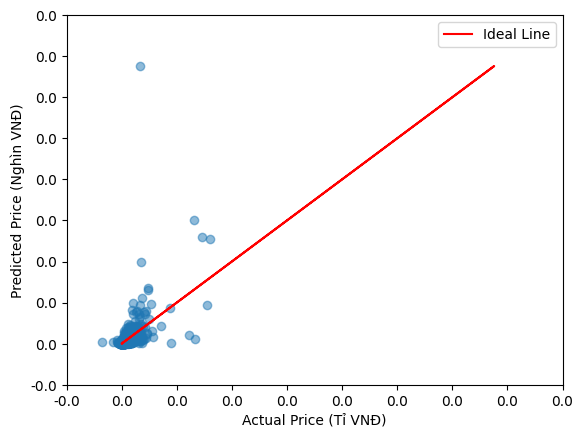

In [68]:
# Visualize khả năng dự đoán
plt.scatter(x=price_predictions, y=Y_test.values, alpha=0.5)
plt.plot(Y_test.values, Y_test.values, color='red', label='Ideal Line')

plt.ylabel('Predicted Price (Nghìn USD)')
plt.xlabel('Actual Price (Ngìn USD)')
plt.legend()

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in yticks]);